In [1]:
from keras.datasets import mnist
(x_train_o, y_train), (x_test_o, y_test) = mnist.load_data()
x_train_o=x_train_o.astype(float)
x_test_o=x_test_o.astype(float)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
print(x_train_o.shape)
print(y_train.shape)
print(x_test_o.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
# print(np.sum(y_train==3))
# l_tr=np.where(y_train==3)
# l2_tr=np.where(y_train!=3)
# print(y_train[l_tr][1:5])

6131
[3 3 3 3]


In [3]:
import numpy as np
print(np.shape(x_train_o))
print(np.shape(y_train))
x_train = np.reshape(x_train_o, (60000, 784))
print(np.shape(x_train))

(60000, 28, 28)
(60000,)
(60000, 784)


In [0]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [5]:
ns = 500
l_tr=np.where(y_train==3)
l2_tr=np.where(y_train!=3)
x_train_d=np.array(x_train)
y_train_d=np.array(y_train)
print(y_train_d.shape)
print(x_train_d.shape)
x_train[0:ns//2][:] = x_train_d[l_tr[0][0:ns//2]][:]
y_train[0:ns//2]= y_train_d[l_tr[0][0:ns//2]]
x_train[ns//2:ns][:] = x_train_d[l2_tr[0][0:ns//2]][:]
y_train[ns//2:ns]= y_train_d[l2_tr[0][0:ns//2]][:]
print(np.sum(y_train==3))

(60000,)
(60000, 784)
6321


In [6]:
y_train=y_train[0:ns]
x_train=x_train[0:ns][:]

y_train[0:ns//2]=1
y_train[ns//2:ns]=0
print(y_train)
print(x_train.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [7]:
for x in np.unique(y_train):
  print(np.shape(y_train[y_train==x])[0]/ns)

0.5
0.5


In [0]:
x_train, y_train = shuffle(x_train, y_train)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

svclassifier = SVC()
svc_param_grid = {'kernel': ['linear'],
                  'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300, 1000]}
gsSVM = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold,scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVM.fit(x_train, y_train)

SVM_best = gsSVM.best_estimator_
gsSVM.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.2s finished


0.8619999999999999

In [0]:
train_data=np.sum(SVM_best.predict(x_train) == y_train)/ns
print(train_data)

1.0


In [9]:

print(np.shape(y_test))
print(np.sum(y_test==3))
x_test = np.reshape(x_test_o, (10000, 784))
print(np.shape(x_test))
y_test.shape

(10000,)
1010
(10000, 784)


(10000,)

In [0]:
nt = 2000
l_tr=np.where(y_test==3)
l2_tr=np.where(y_test!=3)
x_test_d=np.array(x_test)
y_test_d=np.array(y_test)
x_test[0:nt//2][:] = x_test_d[l_tr[0][0:nt//2]][:]
y_test[0:nt//2]=1
x_test[nt//2:nt][:] = x_test_d[l2_tr[0][0:nt//2]][:]
y_test[nt//2:nt]=0
x_test = x_test[0:nt][:]
y_test = y_test[0:nt]

In [0]:
x_test, y_test = shuffle(x_test, y_test)

In [12]:
print(x_test.shape)
print(y_test.shape)
print(np.sum(y_test==0))
print(np.sum(y_test==1))

(2000, 784)
(2000,)
1000
1000


In [0]:
test_data=np.sum(SVM_best.predict(x_test) == y_test)/nt
print(test_data)

0.871


In [0]:
n = 784
m = 200
A = np.random.randn(m,n)
B=np.random.binomial(1,0.5,(m,n))
B[np.where(B==0)]=-1
# x_train_c = np.matmul(x_train, A.T)/m**0.5
# x_test_c = np.matmul(x_test, A.T)/m**0.5
x_train_g = np.matmul(x_train, A.T)/m**0.5
x_test_g = np.matmul(x_test, A.T)/m**0.5
x_train_b = np.matmul(x_train, B.T)/m**0.5
x_test_b = np.matmul(x_test, B.T)/m**0.5
print(np.shape(x_train_b))
print(np.shape(x_train_g))

(500, 200)
(500, 200)


In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

svclassifier = SVC()
svc_param_grid = {'kernel': ['linear'],
                  'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300, 1000]}
gsSVM_g = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVM_g.fit(x_train_g, y_train)

SVM_best_g = gsSVM_g.best_estimator_
print(gsSVM_g.best_score_)

gsSVM_b = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVM_b.fit(x_train_b, y_train)

SVM_best_b = gsSVM_b.best_estimator_
print(gsSVM_b.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8580000000000002
Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.868


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished


In [0]:
train_measurement_gaussian=np.sum(SVM_best_g.predict(x_train_g) == y_train)/ns
print(train_measurement_gaussian)
train_measurement_bernoulli=np.sum(SVM_best_b.predict(x_train_b) == y_train)/ns
print(train_measurement_bernoulli)

1.0
1.0


In [0]:
test_measurement_gaussian=np.sum(SVM_best_g.predict(x_test_g) == y_test)/nt
print(test_measurement_gaussian)
test_measurement_bernoulli=np.sum(SVM_best_b.predict(x_test_b) == y_test)/nt
print(test_measurement_bernoulli)

0.852
0.8475


In [0]:
print("train_data", train_data)
print("test_data", test_data)
print("train_measurement_gaussian", train_measurement_gaussian)
print("test_measurement_gaussian", test_measurement_gaussian)
print("train_measurement_bernoulli", train_measurement_bernoulli)
print("test_measurement_bernoulli", test_measurement_bernoulli)

train_data 1.0
test_data 0.8745
train_measurement_gaussian 1.0
test_measurement_gaussian 0.852
train_measurement_bernoulli 1.0
test_measurement_bernoulli 0.8475


In [0]:
print(y_train)

[0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
n = 784
test_acc_g=[]
train_acc_g=[]
test_acc_b=[]
train_acc_b=[]
meas=[]

m = 200
for m in list(range(800,5,-20)):
  A = np.random.randn(m,n)
  B=np.random.binomial(1,0.5,(m,n))
  B[np.where(B==0)]=-1
  # x_train_c = np.matmul(x_train, A.T)/m**0.5
  # x_test_c = np.matmul(x_test, A.T)/m**0.5
  x_train_g = np.matmul(x_train, A.T)/m**0.5
  x_test_g = np.matmul(x_test, A.T)/m**0.5
  x_train_b = np.matmul(x_train, B.T)/m**0.5
  x_test_b = np.matmul(x_test, B.T)/m**0.5
  print(np.shape(x_train_b))
  print(np.shape(x_train_g))
  kfold = StratifiedKFold(n_splits=10)

  svclassifier = SVC()
  svc_param_grid = {'kernel': ['linear'],
                    'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300, 1000]}
  gsSVM_g = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
  gsSVM_g.fit(x_train_g, y_train)

  SVM_best_g = gsSVM_g.best_estimator_
  print(gsSVM_g.best_score_)

  gsSVM_b = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
  gsSVM_b.fit(x_train_b, y_train)

  SVM_best_b = gsSVM_b.best_estimator_
  print(gsSVM_b.best_score_)
  print(m)
  train_acc_g.append(np.sum(SVM_best_g.predict(x_train_g) == y_train)/ns)
  test_acc_g.append(np.sum(SVM_best_g.predict(x_test_g) == y_test)/nt)
  train_acc_b.append(np.sum(SVM_best_b.predict(x_train_b) == y_train)/ns)
  test_acc_b.append(np.sum(SVM_best_b.predict(x_test_b) == y_test)/nt)
  meas.append(m)


(500, 800)
(500, 800)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.9s finished


0.9020000000000001
800
(500, 780)
(500, 780)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8959999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished


0.9119999999999999
780
(500, 760)
(500, 760)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.906
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished


0.8959999999999999
760
(500, 740)
(500, 740)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.8s finished


0.9099999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.7s finished


0.9179999999999999
740
(500, 720)
(500, 720)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:    3.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.5s finished


0.8939999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


0.906
720
(500, 700)
(500, 700)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.908
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.7s finished


0.9039999999999999
700
(500, 680)
(500, 680)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9019999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.5s finished


0.9040000000000001
680
(500, 660)
(500, 660)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9119999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.4s finished


0.9019999999999999
660
(500, 640)
(500, 640)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.906
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.3s finished


0.908
640
(500, 620)
(500, 620)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.906
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished


0.906
620
(500, 600)
(500, 600)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.906
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished


0.898
600
(500, 580)
(500, 580)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.898
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.1s finished


0.908
580
(500, 560)
(500, 560)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9019999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.9s finished


0.9059999999999999
560
(500, 540)
(500, 540)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.908
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.8s finished


0.9019999999999999
540
(500, 520)
(500, 520)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8879999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished


0.9099999999999999
520
(500, 500)
(500, 500)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.906
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished


0.908
500
(500, 480)
(500, 480)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.898
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished


0.9099999999999999
480
(500, 460)
(500, 460)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.908
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished


0.9159999999999998
460
(500, 440)
(500, 440)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9039999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished


0.8979999999999999
440
(500, 420)
(500, 420)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8960000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.2s finished


0.8939999999999999
420
(500, 400)
(500, 400)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9059999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


0.8859999999999999
400
(500, 380)
(500, 380)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9039999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished


0.8959999999999999
380
(500, 360)
(500, 360)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9100000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


0.9019999999999999
360
(500, 340)
(500, 340)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.898
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished


0.8939999999999999
340
(500, 320)
(500, 320)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8880000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished


0.916
320
(500, 300)
(500, 300)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8939999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished


0.8859999999999999
300
(500, 280)
(500, 280)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8880000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


0.9099999999999999
280
(500, 260)
(500, 260)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9039999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


0.8720000000000001
260
(500, 240)
(500, 240)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8960000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished


0.89
240
(500, 220)
(500, 220)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8959999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished


0.906
220
(500, 200)
(500, 200)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.89
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished


0.89
200
(500, 180)
(500, 180)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.892
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.8940000000000001
180
(500, 160)
(500, 160)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8959999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.8880000000000001
160
(500, 140)
(500, 140)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8580000000000002
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.8720000000000001
140
(500, 120)
(500, 120)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.866
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished


0.8620000000000001
120
(500, 100)
(500, 100)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8460000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished


0.8699999999999999
100
(500, 80)
(500, 80)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Stats for MNIST dataset
No. of Training Samples =  500
No. of Testing Samples =  2000
Dimensions of images 28*28
Number of features in data domain (originally) = 784
Train accuracy in original domain =  1.0
Test accuracy in original domain =  0.882


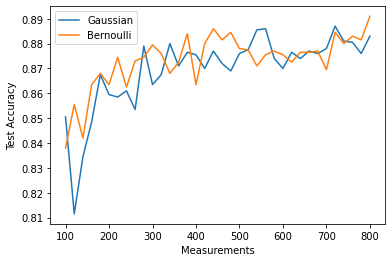

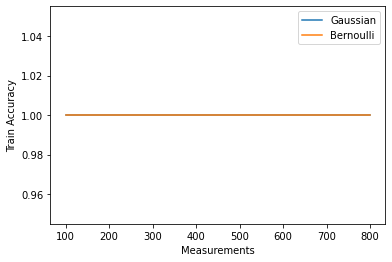

In [0]:
print("Stats for MNIST dataset")
print("No. of Training Samples = ",ns)
print("No. of Testing Samples = ",nt)
print("Dimensions of images 28*28")
print("Number of features in data domain (originally) = 784")
print("Train accuracy in original domain = ", train_data)
print("Test accuracy in original domain = ", test_data)
from matplotlib import pyplot as plt
plt.plot(meas,test_acc_g,label='Gaussian')
plt.plot(meas,test_acc_b,label='Bernoulli')
plt.xlabel('Measurements')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()
plt.plot(meas,train_acc_g,label='Gaussian')
plt.plot(meas,train_acc_b,label='Bernoulli')
plt.xlabel('Measurements')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

In [0]:
print(train_acc_g)
print(train_acc_b)
print(test_acc_g)
print(test_acc_b)
print(meas)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.883, 0.876, 0.8805, 0.881, 0.887, 0.878, 0.876, 0.877, 0.874, 0.8765, 0.87, 0.874, 0.886, 0.8855, 0.8775, 0.876, 0.869, 0.872, 0.877, 0.87, 0.8755, 0.8765, 0.871, 0.88, 0.8675, 0.8635, 0.879, 0.8535, 0.861, 0.8585, 0.8595, 0.8675, 0.8485, 0.8345, 0.8115, 0.8505]
[0.891, 0.8815, 0.883, 0.88, 0.8845, 0.8695, 0.877, 0.8765, 0.8765, 0.8725, 0.8755, 0.877, 0.8755, 0.871, 0.8775, 0.878, 0.8845, 0.8815, 0.886, 0.88, 0.8635, 0.884, 0.8725, 0.868, 0.876, 0.8795, 0.8745, 0.873, 0.8625, 0.8745, 0.8635, 0.868, 0.8635, 0.842, 0.8555, 0.838]
[800, 780, 760, 740, 720, 700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440, 420, 

In [0]:
# from sklearn.preprocessing import StandardScaler
# # e=np.identity(784)
# # x_train=np.matmul(x_train,e)
# # x_train_s = StandardScaler().fit_transform(x_train)
# x_train_s = x_train
# print(x_train_s.shape)

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# p1 = pca.fit(x_train_s)
# print(pca.explained_variance_ratio_)

In [0]:
# pca2 = PCA(100)
# pca2.fit(x_train_s)
# print(pca2.explained_variance_ratio_)
# print(np.sum(pca2.explained_variance_ratio_))

[0.1187872  0.07602445 0.06104695 0.05761873 0.04419068 0.03726334
 0.03101868 0.03000281 0.02844271 0.02411497 0.02143465 0.01972672
 0.01903912 0.01706615 0.01564088 0.01525045 0.01465126 0.01345674
 0.0127508  0.01180023 0.01139071 0.01082283 0.00931059 0.00913229
 0.00862724 0.00840951 0.00788485 0.00763385 0.00701885 0.00689526
 0.006626   0.00637509 0.00627922 0.00603032 0.00588726 0.00552375
 0.00533307 0.00516881 0.00495445 0.0046778  0.0044384  0.00421031
 0.00409538 0.0038901  0.00378071 0.00370007 0.00359166 0.00357035
 0.0033973  0.0033085  0.00324312 0.00303653 0.00288717 0.0028718
 0.00281096 0.00277219 0.00264129 0.00249072 0.00243559 0.00235564
 0.00228506 0.00221647 0.00220177 0.00213945 0.00210565 0.00201262
 0.00200479 0.00193307 0.00190787 0.00184419 0.0017829  0.00173486
 0.00169417 0.00166654 0.00162604 0.00161814 0.00157097 0.00154003
 0.00150493 0.00141698 0.00140607 0.00136533 0.00134852 0.00131496
 0.00128084 0.00127241 0.00124901 0.00122073 0.00120059 0.00116

In [0]:
# print(pca2.explained_variance_ratio_)
# print(pca2.explained_variance_ratio_.shape)

[0.1187872  0.07602445 0.06104695 0.05761873 0.04419068 0.03726334
 0.03101868 0.03000281 0.02844271 0.02411497 0.02143465 0.01972672
 0.01903912 0.01706615 0.01564088 0.01525045 0.01465126 0.01345674
 0.0127508  0.01180023 0.01139071 0.01082283 0.00931059 0.00913229
 0.00862724 0.00840951 0.00788485 0.00763385 0.00701885 0.00689526
 0.006626   0.00637509 0.00627922 0.00603032 0.00588726 0.00552375
 0.00533307 0.00516881 0.00495445 0.0046778  0.0044384  0.00421031
 0.00409538 0.0038901  0.00378071 0.00370007 0.00359166 0.00357035
 0.0033973  0.0033085  0.00324312 0.00303653 0.00288717 0.0028718
 0.00281096 0.00277219 0.00264129 0.00249072 0.00243559 0.00235564
 0.00228506 0.00221647 0.00220177 0.00213945 0.00210565 0.00201262
 0.00200479 0.00193307 0.00190787 0.00184419 0.0017829  0.00173486
 0.00169417 0.00166654 0.00162604 0.00161814 0.00157097 0.00154003
 0.00150493 0.00141698 0.00140607 0.00136533 0.00134852 0.00131496
 0.00128084 0.00127241 0.00124901 0.00122073 0.00120059 0.00116

In [0]:
# # x_train_g_s = StandardScaler().fit_transform(x_train_g)
# x_train_g_s = x_train_g
# pca3 = PCA(100)
# pca3.fit(x_train_g_s)
# print(pca3.explained_variance_ratio_)
# print(np.sum(pca3.explained_variance_ratio_))
# print(pca3.explained_variance_ratio_.shape)
# print(pca3.transform(x_train_g_s))
# print(pca3.transform(x_train_g_s).shape)
# p3=pca3.transform(x_train_g_s)

[0.10136557 0.08884812 0.07133839 0.060348   0.0489301  0.041918
 0.04049491 0.03210349 0.02946936 0.02528267 0.02274691 0.02173362
 0.02010017 0.01784548 0.01749369 0.0163638  0.01445538 0.01313563
 0.0130017  0.01290844 0.01181681 0.01129066 0.01066643 0.00992211
 0.00939147 0.00878199 0.00842141 0.00789705 0.0073277  0.00723026
 0.00693794 0.0065028  0.00639558 0.00627498 0.00590695 0.00577146
 0.00532779 0.00517917 0.00495064 0.0045746  0.00448405 0.00427659
 0.00407023 0.00396634 0.00388147 0.00365967 0.00351846 0.00340114
 0.00330532 0.00307051 0.00301261 0.00289087 0.00279516 0.00271143
 0.00257429 0.00242653 0.00238336 0.00226191 0.00222555 0.00217695
 0.00202833 0.00199503 0.00196973 0.00192673 0.00188594 0.00186235
 0.00184918 0.00180246 0.00170594 0.00163601 0.00159782 0.00155834
 0.00153391 0.00150529 0.00145637 0.00139384 0.00135056 0.00134569
 0.00128714 0.00124701 0.00120438 0.00118428 0.00113874 0.00112914
 0.00108647 0.00107133 0.00103691 0.00100318 0.00095671 0.000947

In [0]:
# print(pca2.transform(x_train_s))
# p2=pca2.transform(x_train_s)
# print(pca2.transform(x_train_s).shape)

[[   93.77549469  -112.96252599  -694.95271395 ...    12.47921129
    -71.97629731    26.81630453]
 [   48.00456725  -295.43262103   759.75228033 ...     7.09205976
    191.37987836    99.93252753]
 [ -387.93404847  -375.40029327   463.89934244 ...   -51.29385901
     62.15847244   117.75716271]
 ...
 [  352.45649736   189.5021722    479.92515627 ...  -153.3619427
    -52.63169093  -115.56540577]
 [-1047.34799139   289.86889345   351.48319449 ...   -29.47659195
     25.63104309   -55.3834367 ]
 [  731.38837885  -698.63698837   384.80718565 ...   -12.17517292
     -9.78134263    -8.03557871]]
(500, 100)


In [0]:
# print(pca2.components_)
# print(pca2.components_.shape)

[[ 1.17120295e-17  6.17823562e-18 -1.80831046e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.25816057e-16 -7.17142133e-17  1.70635117e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.72977030e-17  7.49827322e-17 -2.81390298e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 5.14368503e-15 -5.00147208e-15  2.86671485e-15 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.47627528e-15  6.92090998e-16  2.95727361e-15 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 6.57209443e-15  3.81986418e-16  5.89704168e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(100, 784)


In [0]:
# print(pca3.components_)
# print(pca3.components_.shape)

[[ 0.01051753 -0.01433448  0.07061212 ...  0.04902194  0.00973866
   0.0468803 ]
 [-0.01355811  0.01370842 -0.02664255 ... -0.01389386 -0.00152329
  -0.02741747]
 [ 0.1222946   0.00218178  0.06322695 ... -0.06567156 -0.08421939
  -0.07447478]
 ...
 [ 0.01541889  0.03329524  0.0481359  ...  0.04748982 -0.09662783
   0.0333932 ]
 [-0.04274338  0.01112188 -0.02250073 ... -0.02027999 -0.05215625
   0.00921714]
 [-0.08440445  0.11669689 -0.0234734  ...  0.02056057 -0.03041587
  -0.02011582]]
(100, 200)


In [0]:
# print(A.shape)
# print(np.matmul(pca2.components_, A.T)/m**0.5)

(200, 784)
[[-0.01345875 -0.02153387  0.05062122 ...  0.0578118   0.02765047
   0.06406866]
 [-0.04845799  0.02559786 -0.02369851 ...  0.00974163  0.0077139
  -0.00992022]
 [ 0.11148777 -0.01638759  0.07989597 ... -0.0600941  -0.09330948
  -0.11067085]
 ...
 [-0.04981458  0.00569272 -0.15470102 ... -0.14737023  0.01685272
   0.08455821]
 [-0.02512094  0.00434216  0.01717218 ... -0.01074811 -0.08361906
  -0.00960689]
 [-0.07544536 -0.01026065  0.04494983 ...  0.03091999  0.05464291
  -0.0567323 ]]


In [0]:
# exp=np.matmul(pca2.components_, A.T)/m**0.5
# # exp=exp/np.linalg.norm(exp, ord=2, axis=1, keepdims=True)
# print(exp/np.linalg.norm(exp, ord=2, axis=1, keepdims=True))
# print(np.linalg.norm(exp, ord=2, axis=1, keepdims=True))

[[-0.01511097 -0.0241774   0.05683556 ...  0.06490887  0.03104489
   0.07193383]
 [-0.0465449   0.02458728 -0.02276291 ...  0.00935704  0.00740936
  -0.00952858]
 [ 0.10791063 -0.01586179  0.07733246 ... -0.05816595 -0.0903156
  -0.10711992]
 ...
 [-0.04756956  0.00543617 -0.14772903 ... -0.14072862  0.0160932
   0.08074738]
 [-0.02427694  0.00419628  0.01659524 ... -0.010387   -0.08080966
  -0.00928412]
 [-0.07523401 -0.01023191  0.04482392 ...  0.03083337  0.05448984
  -0.05657337]]
[[0.89066105]
 [1.04110196]
 [1.03314911]
 [0.95616669]
 [1.05842841]
 [0.9974882 ]
 [1.06347892]
 [1.0539605 ]
 [1.01405241]
 [0.92092341]
 [0.9631496 ]
 [0.94994901]
 [0.9596576 ]
 [0.96558902]
 [1.01608326]
 [1.02895515]
 [1.01430719]
 [1.01786808]
 [0.9797709 ]
 [1.0244365 ]
 [0.9670145 ]
 [0.93795286]
 [1.04037827]
 [0.91866948]
 [1.04167781]
 [1.00073001]
 [1.0721994 ]
 [1.04342717]
 [0.98916638]
 [0.99818479]
 [0.96461871]
 [1.03204839]
 [1.0423364 ]
 [0.93394599]
 [1.04266691]
 [1.01492423]
 [0.98

In [0]:
# d=np.sqrt(np.sum(((exp - pca3.components_) ** 2),axis=1,keepdims=True)/np.sum(((pca3.components_) ** 2),axis=1,keepdims=True))
# print(d.shape)
# print(d)

(100, 1)
[[0.34535823]
 [0.44159351]
 [0.53885665]
 [1.86192442]
 [1.95700426]
 [1.64145775]
 [0.9408333 ]
 [0.91136135]
 [1.78380266]
 [0.83014942]
 [1.52298266]
 [1.59562985]
 [1.20114571]
 [1.47951832]
 [1.56232117]
 [1.74121068]
 [1.47785174]
 [1.32436517]
 [1.22674169]
 [1.58625888]
 [1.26835963]
 [1.48760292]
 [1.10423861]
 [1.45397638]
 [1.51617427]
 [1.67760834]
 [1.43454186]
 [1.44878009]
 [1.65321201]
 [1.26220403]
 [1.43011179]
 [1.44668894]
 [1.56913959]
 [1.36883261]
 [1.51500926]
 [1.38650727]
 [1.67515939]
 [1.58810757]
 [1.65658987]
 [1.29895683]
 [1.40785653]
 [1.29624004]
 [1.49636938]
 [1.26006193]
 [1.3497903 ]
 [1.45677536]
 [1.39499108]
 [1.2058093 ]
 [1.5190142 ]
 [1.44944069]
 [1.35946226]
 [1.40487394]
 [1.50178539]
 [1.36083041]
 [1.63341816]
 [1.38529757]
 [1.51475026]
 [1.33061555]
 [1.30353721]
 [1.2419419 ]
 [1.46113135]
 [1.47456432]
 [1.42264636]
 [1.1451985 ]
 [1.39190877]
 [1.40227314]
 [1.25088813]
 [1.23576374]
 [1.30525957]
 [1.33241822]
 [1.1957398

In [0]:
# print(np.matmul(x_train_g,x_train_g.T))
# print()
# print(np.matmul(x_train,x_train.T))

[[4762719.97604734 2647520.14809971  935513.02561291 ... 1541642.89979657
  2633514.99754573 1347046.60003925]
 [2647520.14809971 9788425.93711823 2772690.18882019 ... 2428364.53668376
  4867962.39016634 2651072.49990036]
 [ 935513.02561291 2772690.18882019 3875996.16699548 ... 1069189.11023283
  2623148.1857106  1337015.92699937]
 ...
 [1541642.89979657 2428364.53668376 1069189.11023283 ... 7387579.37591788
  2057250.53372578 2994199.51053679]
 [2633514.99754573 4867962.39016634 2623148.1857106  ... 2057250.53372578
  6596103.51977023 1562814.16331764]
 [1347046.60003925 2651072.49990036 1337015.92699937 ... 2994199.51053679
  1562814.16331764 4613882.3777731 ]]

[[4911926. 2964366. 1144113. ... 1584636. 2595095. 2239907.]
 [2964366. 9769138. 2914362. ... 2822156. 4985827. 3520947.]
 [1144113. 2914362. 3662527. ... 1163343. 2219314. 1503692.]
 ...
 [1584636. 2822156. 1163343. ... 6742444. 2128127. 2676895.]
 [2595095. 4985827. 2219314. ... 2128127. 6803373. 1594382.]
 [2239907. 352094

In [0]:
# for i in list(range(0,10)):
#   print(np.dot(exp[i,:],pca3.components_[i,:]) /(np.linalg.norm(exp[i,:]) * np.linalg.norm(pca3.components_[i,:])))

0.9397541309163913
0.9071582486685295
0.8600068336743151
-0.811839517645674
-0.8076101098239998
-0.3505809965687908
0.585728633690942
0.6073535085025124
-0.5688313651896967
0.629233577468679


In [0]:
# for i in list(range(0,10)):
#   print(np.dot(p2[i,:],p3[i,:]) /(np.linalg.norm(p2[i,:]) * np.linalg.norm(p3[i,:])))

0.07960057864787332
-0.13478527358360667
0.3546096386917526
0.34177957795106206
0.10966844560911572
0.32151676794710987
0.2050376623573918
0.007009560314412689
0.09439600807868054
-0.05161731699520901


In [0]:
# # print(p2.shape)
# # print(p3.shape)
# p2_test=pca2.transform(x_test)
# p3_test=pca3.transform(x_test_g)

(500, 100)
(500, 100)


In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
x_train_s = x_train

pca2 = PCA(100)
pca2.fit(x_train_s)
p2=pca2.transform(x_train_s)
p2_test=pca2.transform(x_test)

svclassifier = SVC()
svc_param_grid = {'kernel': ['linear'],
                    'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300, 1000]}

gsSVM_data = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVM_data.fit(p2, y_train)

SVM_best_data = gsSVM_data.best_estimator_
print(gsSVM_data.best_score_)
# print(m)
# print("measurement train ",np.sum(SVM_best_g.predict(p3) == y_train)/ns)
# print("measurement test ",np.sum(SVM_best_g.predict(p3_test) == y_test)/nt)
train_data=np.sum(SVM_best_data.predict(p2) == y_train)/ns
test_data=np.sum(SVM_best_data.predict(p2_test) == y_test)/nt
print("data train",np.sum(SVM_best_data.predict(p2) == y_train)/ns)
print("data test",np.sum(SVM_best_data.predict(p2_test) == y_test)/nt)






Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9039999999999999
data train 1.0
data test 0.875


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


In [14]:
n = 784
test_acc_g=[]
train_acc_g=[]
test_acc_b=[]
train_acc_b=[]
meas=[]

m = 200
for m in list(range(800,100,-20)):
  A = np.random.randn(m,n)
  B=np.random.binomial(1,0.5,(m,n))
  B[np.where(B==0)]=-1
  # x_train_c = np.matmul(x_train, A.T)/m**0.5
  # x_test_c = np.matmul(x_test, A.T)/m**0.5
  x_train_g = np.matmul(x_train, A.T)/m**0.5
  x_test_g = np.matmul(x_test, A.T)/m**0.5
  x_train_b = np.matmul(x_train, B.T)/m**0.5
  x_test_b = np.matmul(x_test, B.T)/m**0.5
  # x_train_g_s = x_train_g
  pca3 = PCA(100)
  pca3.fit(x_train_g)
  p3=pca3.transform(x_train_g)
  p3_test=pca3.transform(x_test_g)
  pca4 = PCA(100)
  pca4.fit(x_train_b)
  p4=pca4.transform(x_train_b)
  p4_test=pca4.transform(x_test_b)
  print(np.shape(x_train_b))
  print(np.shape(x_train_g))
  kfold = StratifiedKFold(n_splits=10)

  svclassifier = SVC()
  svc_param_grid = {'kernel': ['linear'],
                    'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300, 1000]}
  gsSVM_g = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
  gsSVM_g.fit(p3, y_train)

  SVM_best_g = gsSVM_g.best_estimator_
  print(gsSVM_g.best_score_)

  gsSVM_b = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
  gsSVM_b.fit(p4, y_train)

  SVM_best_b = gsSVM_b.best_estimator_
  print(gsSVM_b.best_score_)
  print(m)
  train_acc_g.append(np.sum(SVM_best_g.predict(p3) == y_train)/ns)
  test_acc_g.append(np.sum(SVM_best_g.predict(p3_test) == y_test)/nt)
  train_acc_b.append(np.sum(SVM_best_b.predict(p4) == y_train)/ns)
  test_acc_b.append(np.sum(SVM_best_b.predict(p4_test) == y_test)/nt)
  meas.append(m)

(500, 800)
(500, 800)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8939999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.884
800
(500, 780)
(500, 780)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.884
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.882
780
(500, 760)
(500, 760)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.898
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished


0.8880000000000001
760
(500, 740)
(500, 740)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8800000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.884
740
(500, 720)
(500, 720)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9120000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.9039999999999999
720
(500, 700)
(500, 700)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.892
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.8800000000000001
700
(500, 680)
(500, 680)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8939999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.892
680
(500, 660)
(500, 660)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8999999999999998
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.892
660
(500, 640)
(500, 640)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9120000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.8960000000000001
640
(500, 620)
(500, 620)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8780000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.882
620
(500, 600)
(500, 600)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8800000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.8699999999999999
600
(500, 580)
(500, 580)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9039999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.8779999999999999
580
(500, 560)
(500, 560)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.9
560
(500, 540)
(500, 540)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.89
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.89
540
(500, 520)
(500, 520)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8959999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.8939999999999999
520
(500, 500)
(500, 500)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8720000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.898
500
(500, 480)
(500, 480)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.884
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished


0.882
480
(500, 460)
(500, 460)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.868
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.8879999999999999
460
(500, 440)
(500, 440)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.8780000000000001
440
(500, 420)
(500, 420)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8880000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished


0.874
420
(500, 400)
(500, 400)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.884
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.8959999999999999
400
(500, 380)
(500, 380)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8800000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.8779999999999999
380
(500, 360)
(500, 360)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8859999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished


0.89
360
(500, 340)
(500, 340)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8819999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.85
340
(500, 320)
(500, 320)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.876
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.9
320
(500, 300)
(500, 300)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.868
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished


0.8780000000000001
300
(500, 280)
(500, 280)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9019999999999999
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


0.882
280
(500, 260)
(500, 260)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8540000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.8960000000000001
260
(500, 240)
(500, 240)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


0.876
240
(500, 220)
(500, 220)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8860000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


0.8640000000000001
220
(500, 200)
(500, 200)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.882
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8700000000000001
200
(500, 180)
(500, 180)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8800000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8780000000000001
180
(500, 160)
(500, 160)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8919999999999998
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.882
160
(500, 140)
(500, 140)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8720000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8720000000000001
140
(500, 120)
(500, 120)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8720000000000001
Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.8720000000000001
120


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished


Stats for MNIST dataset SVM using PCA with 100 components
No. of Training Samples =  500
No. of Testing Samples =  2000
Dimensions of images 28*28
Number of features in data domain (originally) = 784
Number of PCA components = 100 for both data domain and measurement domain 
Train accuracy in original domain =  1.0
Test accuracy in original domain =  0.875


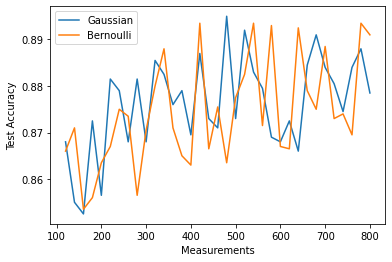

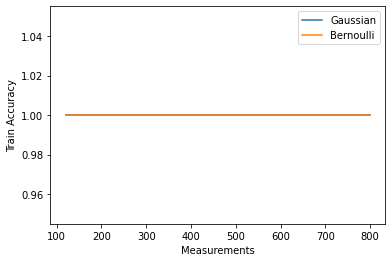

In [16]:
print("Stats for MNIST dataset SVM using PCA with 100 components")
print("No. of Training Samples = ",ns)
print("No. of Testing Samples = ",nt)
print("Dimensions of images 28*28")
print("Number of features in data domain (originally) = 784")
print("Number of PCA components = 100 for both data domain and measurement domain ")
print("Train accuracy in original domain = ", train_data)
print("Test accuracy in original domain = ", test_data)
from matplotlib import pyplot as plt
plt.plot(meas,test_acc_g,label='Gaussian')
plt.plot(meas,test_acc_b,label='Bernoulli')
plt.xlabel('Measurements')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()
plt.plot(meas,train_acc_g,label='Gaussian')
plt.plot(meas,train_acc_b,label='Bernoulli')
plt.xlabel('Measurements')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

In [0]:
print(p3.shape)
print(p2.shape)
print(p2_test.shape)
print(p3_test.shape)

(500, 100)
(500, 100)
(2000, 100)
(2000, 100)


In [0]:
t2=np.matmul(x_train_s,pca2.components_.T)
print(np.matmul(x_train_s,pca2.components_.T))
f1=np.matmul(x_train_s,A.T)
print(f1.shape)
print(A.shape)
g=np.matmul(f1,A)
print(np.matmul(g,pca2.components_.T)/m)
print()
# print(pca2.transform(x_train_s))
t3=np.matmul(x_train_g_s,pca3.components_.T)
print(np.matmul(x_train_g_s,pca3.components_.T))
# print(np.matmul(pca2.components_,pca2.components_.T))


[[ 8.21712376e+02  6.91342522e+02 -4.76140271e+02 ... -3.83742661e-01
  -7.13217161e+01  3.54302759e+01]
 [ 7.75941449e+02  5.08872427e+02  9.78564723e+02 ... -5.77089419e+00
   1.92034460e+02  1.08546499e+02]
 [ 3.40002833e+02  4.28904755e+02  6.82711785e+02 ... -6.41568130e+01
   6.28130537e+01  1.26371134e+02]
 ...
 [ 1.08039338e+03  9.93807221e+02  6.98737599e+02 ... -1.66224897e+02
  -5.19771097e+01 -1.06951434e+02]
 [-3.19411110e+02  1.09417394e+03  5.70295637e+02 ... -4.23395459e+01
   2.62856243e+01 -4.67694654e+01]
 [ 1.45932526e+03  1.05668060e+02  6.03619628e+02 ... -2.50381269e+01
  -9.12676138e+00  5.78392625e-01]]
(500, 200)
(200, 784)
[[ 5.08211506e+02  8.97108634e+02 -5.90601305e+02 ...  9.41187099e+00
  -2.74944179e+02 -1.17099634e+00]
 [ 4.27547177e+02  8.23324170e+02  1.02280522e+03 ... -3.79571044e+02
   4.60171703e+02  3.18604032e+02]
 [ 8.78519924e+01  8.62657208e+02  7.14995033e+02 ... -1.90120899e+02
   6.17678635e+01  2.89261392e+02]
 ...
 [ 1.05764844e+03  1.0

In [0]:
for i in list(range(0,10)):
  print(np.dot(t2[i,:],t3[i,:]) /(np.linalg.norm(t2[i,:]) * np.linalg.norm(t3[i,:])))

-0.002070577751351654
-0.09326591928620177
0.3273862287060057
0.5438094024611159
0.373085088809044
0.40128263326989605
0.2795994498725493
0.24515628642539605
0.30755402444328717
0.02385367195660565
